In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Transforming data to a json
record oriented

In [291]:
df = pd.read_csv("/Users/finn/Documents/GitHub/data/e4e3/Uncleaned Data/Chicago_Employees.csv")

In [292]:
df['Income'] = df['Typical Hours']*df['Hourly Rate']
df.loc[df['Salary or Hourly'] == 'SALARY', 'Income'] = df['Annual Salary']
df = df.query('Income > 5000')


In [293]:
df.Income.describe()

count    24288.00000
mean     99487.02355
std      24427.70677
min      22248.00000
25%      85344.00000
50%     100524.00000
75%     111966.00000
max     275004.00000
Name: Income, dtype: float64

In [294]:
df = df[['Name', 'Job Titles', 'Department', 'Income', 'Salary or Hourly']]
df['Department'] = df['Department'].str.title()
df['Job Titles'] = df['Job Titeles'].str.title()
u_df = df.copy()

In [295]:
df = df.groupby(by=['Department', 'Job Titles']).agg({'Income': ['mean', 'sum', 'median', 'count']}).reset_index()
df.columns = [ '_'.join(col).strip().lstrip("_").strip("_") for col in df.columns.values]

In [296]:
df

,Department,Job Titles,Income_mean,Income_sum,Income_median,Income_count
0,Board Of Election Commissioner,A/Suprv Redistricting,58524.00000,58524.00000,58524.00000,1
1,Board Of Election Commissioner,Admin Asst To The Commissioners,78708.00000,78708.00000,78708.00000,1
2,Board Of Election Commissioner,Asst Executive Dir - Bd Of Elections,136872.00000,136872.00000,136872.00000,1
3,Board Of Election Commissioner,Asst Manager - Bd Of Elections,88958.40000,444792.00000,85740.00000,5
4,Board Of Election Commissioner,Asst To The Dir,74988.00000,74988.00000,74988.00000,1
...,...,...,...,...,...,...
1697,Public Safety Administration,Senior Programmer/Analyst,122112.00000,122112.00000,122112.00000,1
1698,Public Safety Administration,Senior Telecommunications Specialist,112716.00000,112716.00000,112716.00000,1
1699,Public Safety Administration,Staff Asst,76389.00000,305556.00000,73962.00000,4
1700,Public Safety Administration,Supervising Investigator,79722.00000,159444.00000,79722.00000,2


In [297]:
df.Department.value_counts()

Department Of Public Health                   125
Department Of Aviation                        112
Dept Of Water Management                      111
Chicago Dept Of Transportation                103
Dais                                           98
Department Of Police                           93
Family And Support Services                    85
Fire Department                                81
Department Of Finance                          80
Chicago Public Library                         68
Public Safety Administration                   65
Department Of Planning And Development         54
Bus Affairs And Consumer Prot                  50
Dept Streets And Sanitation                    49
Dept Of Buildings                              44
Department Of Law                              40
City Clerk                                     40
Office Of Emergency Management                 38
Department Of Human Resources                  35
Ig                                             34


In [298]:
df

,Department,Job Titles,Income_mean,Income_sum,Income_median,Income_count
0,Board Of Election Commissioner,A/Suprv Redistricting,58524.00000,58524.00000,58524.00000,1
1,Board Of Election Commissioner,Admin Asst To The Commissioners,78708.00000,78708.00000,78708.00000,1
2,Board Of Election Commissioner,Asst Executive Dir - Bd Of Elections,136872.00000,136872.00000,136872.00000,1
3,Board Of Election Commissioner,Asst Manager - Bd Of Elections,88958.40000,444792.00000,85740.00000,5
4,Board Of Election Commissioner,Asst To The Dir,74988.00000,74988.00000,74988.00000,1
...,...,...,...,...,...,...
1697,Public Safety Administration,Senior Programmer/Analyst,122112.00000,122112.00000,122112.00000,1
1698,Public Safety Administration,Senior Telecommunications Specialist,112716.00000,112716.00000,112716.00000,1
1699,Public Safety Administration,Staff Asst,76389.00000,305556.00000,73962.00000,4
1700,Public Safety Administration,Supervising Investigator,79722.00000,159444.00000,79722.00000,2


In [299]:

df.columns = ['Department', 'Role', 'Mean_Income', 'value', "Median_Income", "Count"]

In [300]:
df.sort_values(by='value', ascending=False)

,Department,Role,Mean_Income,value,Median_Income,Count
867,Department Of Police,Police Officer,95781.33122,815482254.00000,97974.00000,8514
890,Department Of Police,Sergeant,128197.75158,162041958.00000,129666.00000,1264
1456,Fire Department,Firefighter-Emt,99970.98229,146757402.00000,98904.00000,1468
872,Department Of Police,Police Officer (Assigned As Detective),115412.86268,131109012.00000,117690.00000,1136
1457,Fire Department,Firefighter-Emt (Recruit),81769.38750,52332408.00000,84612.00000,640
...,...,...,...,...,...,...
224,Chicago Public Library,Graphic Artist Ii,44808.00000,44808.00000,44808.00000,1
1405,Family And Support Services,Unit Asst,40860.00000,40860.00000,40860.00000,1
563,Department Of Aviation,Inquiry Aide Iii,40860.00000,40860.00000,40860.00000,1
521,Department Of Aviation,Clerk Iii,37224.00000,37224.00000,37224.00000,1


rebinding a few key departments for legibility:

In [301]:
df.groupby(by=['Department']).sum().reset_index().sort_values(by='value', ascending=False)
rebinds = {
    "Department Of Police"
}

In [302]:
df.to_json('chicago_jobs.json',orient='records')

In [303]:
df.query("Role == 'Cement Finisher'")

,Department,Role,Mean_Income,value,Median_Income,Count


In [304]:
df

,Department,Role,Mean_Income,value,Median_Income,Count
0,Board Of Election Commissioner,A/Suprv Redistricting,58524.00000,58524.00000,58524.00000,1
1,Board Of Election Commissioner,Admin Asst To The Commissioners,78708.00000,78708.00000,78708.00000,1
2,Board Of Election Commissioner,Asst Executive Dir - Bd Of Elections,136872.00000,136872.00000,136872.00000,1
3,Board Of Election Commissioner,Asst Manager - Bd Of Elections,88958.40000,444792.00000,85740.00000,5
4,Board Of Election Commissioner,Asst To The Dir,74988.00000,74988.00000,74988.00000,1
...,...,...,...,...,...,...
1697,Public Safety Administration,Senior Programmer/Analyst,122112.00000,122112.00000,122112.00000,1
1698,Public Safety Administration,Senior Telecommunications Specialist,112716.00000,112716.00000,112716.00000,1
1699,Public Safety Administration,Staff Asst,76389.00000,305556.00000,73962.00000,4
1700,Public Safety Administration,Supervising Investigator,79722.00000,159444.00000,79722.00000,2


### Wage Distributions

In [280]:
u_df.sort_values(by='Income', ascending=False)

,Name,Job Titles,Department,Income,Salary or Hourly
13086,"RHEE, JAMIE L",Commissioner Of Aviation,Department Of Aviation,275004.00000,SALARY
10548,"BROWN, DAVID O",Superintendent Of Police,Department Of Police,260004.00000,SALARY
14296,"NANCE HOLT, ANNETTE M",Fire Commissioner,Fire Department,228612.00000,SALARY
6252,"LIGHTFOOT, LORI E",Mayor,Office Of The Mayor,216210.00000,SALARY
15454,"SHERIDAN, MARY L",First Deputy Fire Commissioner,Fire Department,207624.00000,SALARY
...,...,...,...,...,...
20574,"BARKER-DROUGHNS, MONIQUE L",Clerk - Bd Of Elections,Board Of Election Commissioner,33180.00000,SALARY
22626,"CORNEJO VACA, TERESA",Clerk - Bd Of Elections,Board Of Election Commissioner,33180.00000,SALARY
6788,"PETERSON, THOMAS K",Clerk - Bd Of Elections,Board Of Election Commissioner,33180.00000,SALARY
18316,"SUTTON, MONIQUE A",Legislative Aide,City Council,30900.00000,SALARY


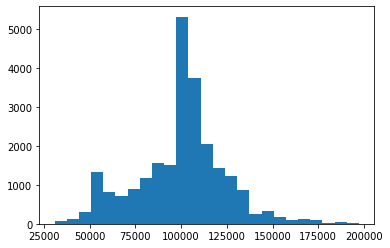

In [281]:
# Create a histogram from the 'values' column
plt.hist(u_df.query("25000 < Income < 200000")['Income'], bins=25, )

# Show the plot
plt.show()

In [282]:
count, division = np.histogram(u_df.query("2500 < Income < 200000")['Income'], bins=25)

In [283]:
pd.DataFrame({'count': count, 'bin_start': division[:-1], 'bin_end': division[1:]}).to_json('hist_data/chicago_hist.json', orient='records')

baking job titles:

In [284]:
for title in u_df['Job Titles'].unique():
    filtered_df = u_df[(u_df['Job Titles'] == title) & (u_df['Income'] > 2500) & (u_df['Income'] < 200000)]
    count, division = np.histogram(filtered_df['Income'], bins=25)
    file_str = f"hist_data/job_titles/{re.sub(r'[^a-zA-Z]+', '', title)}.json"
    pd.DataFrame({'count': count, 'bin_start': division[:-1], 'bin_end': division[1:]}).to_json(file_str, orient='records')

and departments

In [285]:
for title in u_df['Department'].unique():
    filtered_df = u_df[(u_df['Department'] == title) & (u_df['Income'] > 2500) & (u_df['Income'] < 200000)]
    count, division = np.histogram(filtered_df['Income'], bins=25)
    file_str = f"hist_data/departments/{re.sub(r'[^a-zA-Z]+', '', title)}.json"
    pd.DataFrame({'count': count, 'bin_start': division[:-1], 'bin_end': division[1:]}).to_json(file_str, orient='records')

In [286]:
u_df.to_json('chicago_employees.json',orient='records')

In [287]:
dep_medians = u_df.groupby(by=['Department']).median().reset_index().sort_values(by='Income', ascending=False)

In [289]:
dict(zip(dep_medians['Department'], dep_medians['Income']))

{'Ccpsa': 138180.0,
 'Dept Of Buildings': 114138.0,
 'Board Of Ethics': 105798.0,
 'Department Of Police': 104934.0,
 'Office Of Budget & Management': 103920.0,
 'Department Of Law': 103920.0,
 'Chicago Dept Of Transportation': 103920.0,
 'Dais': 103134.0,
 'License Appeal Commission': 102732.0,
 'Dept Of Water Management': 102696.0,
 'Commission On Human Relations': 102516.0,
 'Fire Department': 102372.0,
 'Office Of The Mayor': 100740.0,
 'Dept Of Cultural Affairs': 98520.0,
 'City Treasurer': 97332.0,
 'Dept Streets And Sanitation': 94704.0,
 'Office Of Climate And Environmental Equity': 94680.0,
 'Department Of Planning And Development': 93780.0,
 'Department Of Procurement Serv': 93660.0,
 'Department Of Human Resources': 93378.0,
 'Police Board': 92322.0,
 'Bus Affairs And Consumer Prot': 90444.0,
 'Department Of Public Health': 89808.0,
 'Family And Support Services': 89388.0,
 'Dept Of Housing': 89076.0,
 'Public Safety Administration': 86442.0,
 'Ig': 85248.0,
 'Copa': 84084.0